In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

1. Проаналізуємо динаміку кількості зареєстрованих користувачів по годинах:

In [53]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
def get_hour_from_datetime(x):
    if isinstance(x, pd.Timestamp):
        return int(x.strftime('%H'))
    return None
df['Hour'] = df['datetime'].apply(get_hour_from_datetime)

In [54]:
df_registered_by_hour = df.groupby('Hour')['registered'].sum().reset_index()

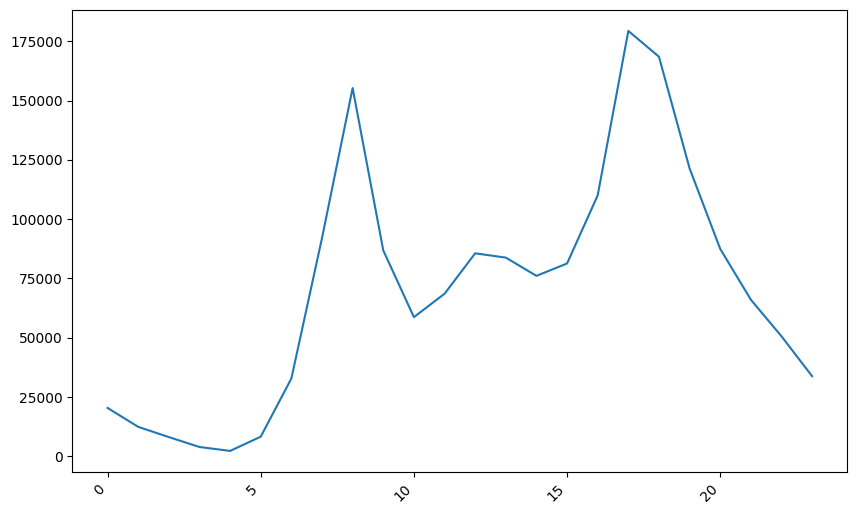

In [55]:
x = df_registered_by_hour.Hour
y = df_registered_by_hour.registered
plt.figure(figsize=(10, 6))
plt.plot(x, y);
plt.xticks(rotation=45, ha='right');

2. Чи є зв"язок між загальним станом погоди, швидкістю вітру та загальною кількістю користувачів сервісу?

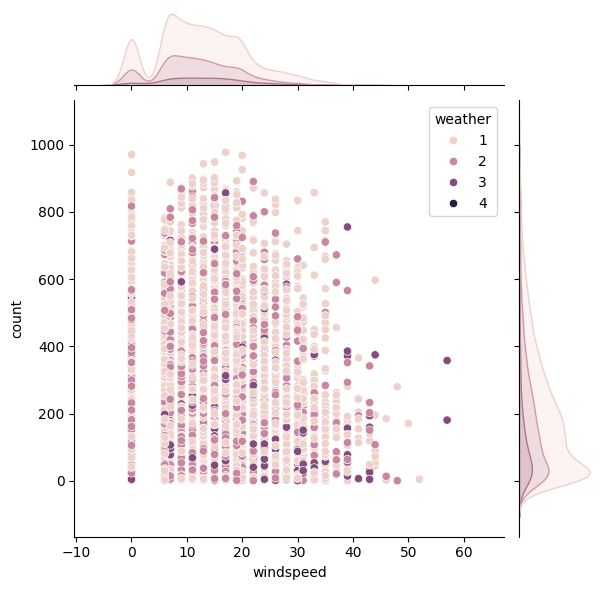

In [56]:
sns.jointplot(data=df, x="windspeed", y="count", hue="weather");

3. Якою є переважна різниця між температурою, що відчувається та фактичною? Чи впливає розмір цієї різниці на кількість користувачів?

In [57]:
df['temp_diff'] = df['atemp'] - df['temp']

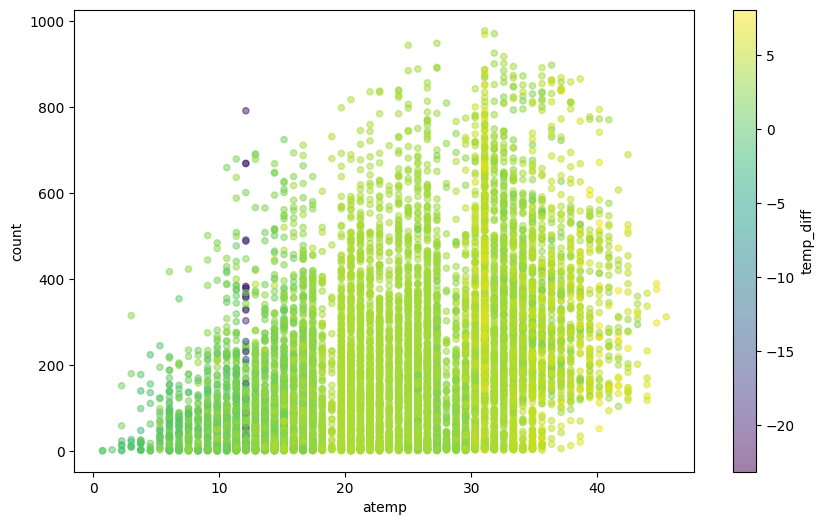

In [58]:
ax = df.plot.scatter(x='atemp', y='count', alpha=0.5, c='temp_diff', figsize=(10, 6))